In [5]:
#Authored by Kyle Larson and Kyle Savery for machine learning 3d print application
#Todo bring time stamp in
import csv
instr = "cr"
ostr = "ocarina.csv"
with open(instr, 'r') as fileI:
    my_reader = csv.reader(fileI, delimiter=',')
    f = open(ostr, 'w')
    #note the manually added one at the end of this line due to 
    #the first index being skipped OPTIONAL TODO: fix the '1'
    f.write("Index,Temperature,Distance1,Distance2,Distance3\n1,")
    splitFlag = 1
    splitFlop =0
    distCt =0
    towrite=""
    t=0
    for row in my_reader:
        #ToDo: time stamp magic here
        
        #erase white space
        #check for split
        
        if ( len(row) != 0 and row[0] != ' '):
            row = row[0].split()
            lr = len(row[0])
            
            if(row[0][lr-3] =="." and splitFlag != 1):
                t = t+1
                
                #reset split flag
                splitFlag =2
                towrite = str(t) +","+row[0][0:lr]+","
                
                splitFlop = 1
                distCt = 0
        #else if quadruple 
        #no split run as usual
            if( row[0].isnumeric() ):
                if(distCt<2):
                    towrite = towrite+row[0][0:3]+","
                    distCt = distCt +1;
                elif(distCt==2):
                    towrite = towrite+row[0][0:3]+",\n"
                    distCt = 0
                    f.write(towrite)
                    towrite = ""
            if(row[0][lr-3] == "." and splitFlop!=1):
                t = t+1
                towrite = towrite+row[0][0:lr]+","
                distCt = 0 
            splitFlag=splitFlag+1
            splitFlop =0
f.close()

In [6]:
import pandas as pd
hc51_df =hc51_df = pd.read_csv(ostr)
#for some reason pandas doesnt like my choice of columns so some renaming is necessary
hc51_df =hc51_df.rename(columns={"Distance2":"Distance_3"})
hc51_df =hc51_df.rename(columns={"Distance1":"Distance_2"})
hc51_df =hc51_df.rename(columns={"Temperature":"Distance_1"})
hc51_df = hc51_df.rename(columns={"Index":"Temperature"})
cols =list(hc51_df.columns)
#some of the columns are treated as strings and should instead be integers
hc51_df['Temperature'] = pd.to_numeric(hc51_df['Temperature'])
i=0
for _ in cols:
    i=i+1
    if(i==2):
        hc51_df[_] = hc51_df[_].astype(int)
hc51_df = hc51_df.drop("Distance3", axis=1)
hc51_df.head()

,Temperature,Distance_1,Distance_2,Distance_3
1,76.55,119,120.0,121.0
2,76.55,120,119.0,120.0
3,77.00,116,117.0,115.0
4,76.10,122,119.0,119.0
5,76.10,121,119.0,120.0


In [7]:
#it is clear that the some of the temperature values were missing 
#and pandas just grabbed the distance measurement
hc51_df = hc51_df.dropna()
#361 is the max theoretical measurement because of where the sensor was located
hc51_df.drop(hc51_df[hc51_df['Distance_1'] >= 360].index, inplace = True)
hc51_df.drop(hc51_df[hc51_df['Distance_2'] >= 360].index, inplace = True)
hc51_df.drop(hc51_df[hc51_df['Distance_3'] >= 360].index, inplace = True)

/home/k/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/k/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/k/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warni

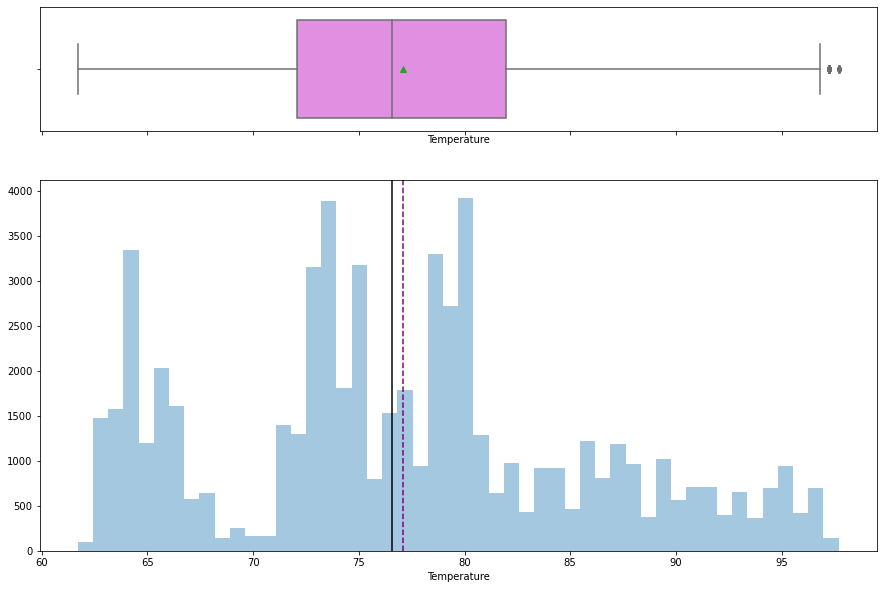

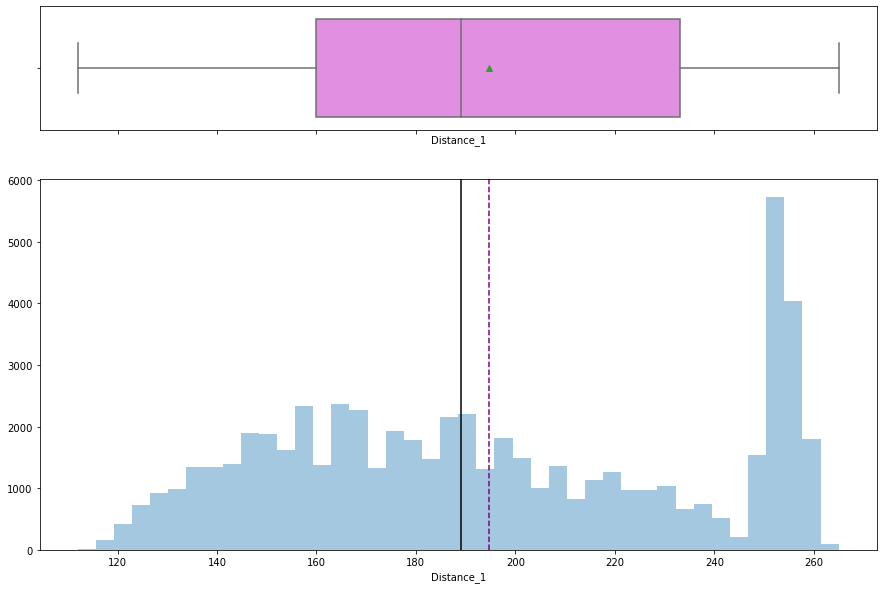

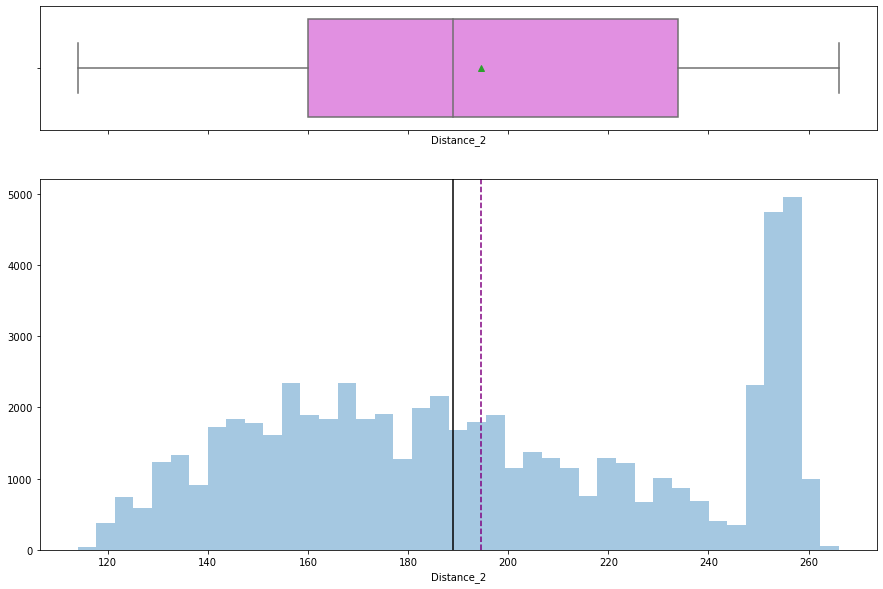

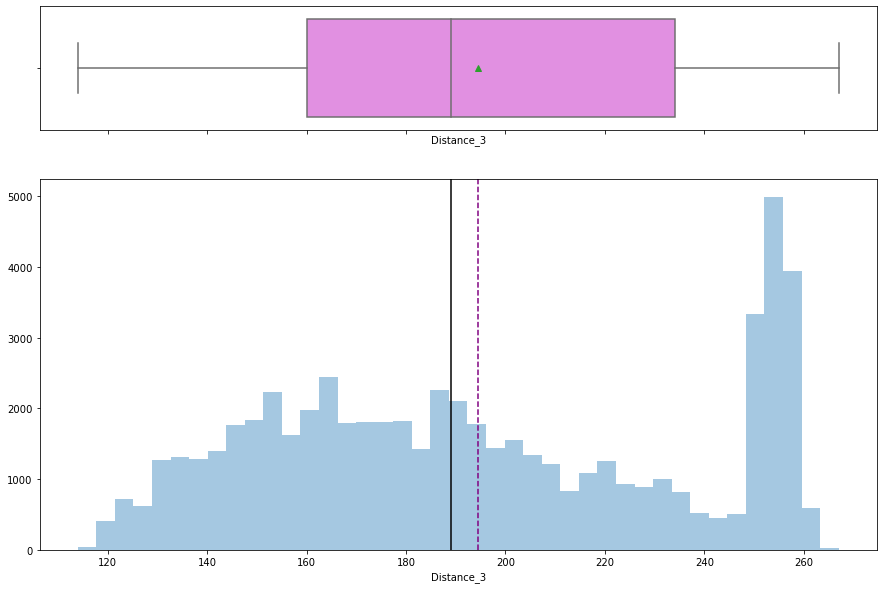

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:blue"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram



#hopefully dropna fixed it


cols =list(hc51_df.columns)
for _ in cols:
    histogram_boxplot(hc51_df[_])

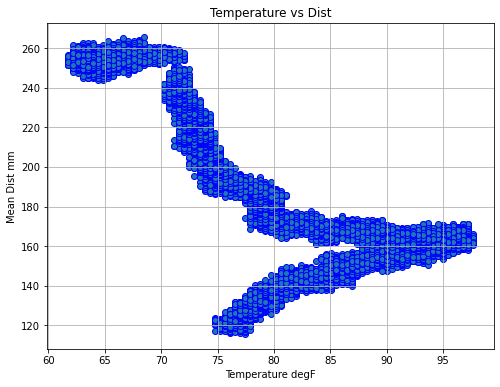

In [9]:
#Lets Now See About Relationships 
# its clear the distance data have roughly the same standard deviation however 
# we want residuals not pure st dev
hc51_df['Mean Dist'] = (hc51_df["Distance_1"]+hc51_df["Distance_2"]+hc51_df["Distance_3"])/3

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(hc51_df["Temperature"], hc51_df["Mean Dist"], edgecolors=(0, 0, 1))
ax.set_xlabel('Temperature degF')
ax.set_ylabel('Mean Dist mm')
ax.set_title("Temperature vs Dist")
plt.grid()
plt.show()
#correlation doesnt imply causation however 
#and its really the variability in the Mean Dist that is the objective of this plot.

In [10]:

#square residual
def sr(Y, Y_bar):
    return (Y-Y_bar)**2

hc51_df['Var Dist'] =( sr(hc51_df['Distance_1'],hc51_df['Mean Dist']) + 
    sr(hc51_df['Distance_2'],hc51_df['Mean Dist']) + 
    sr(hc51_df['Distance_3'],hc51_df['Mean Dist']) )/3

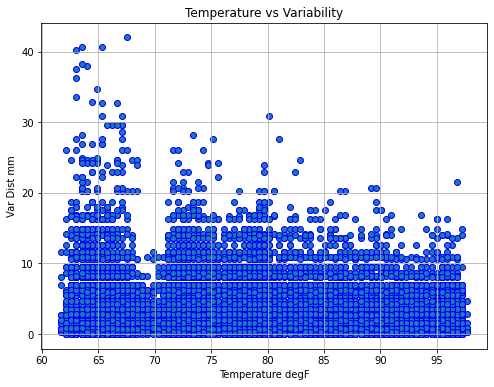

In [11]:
#how was temperature related to variance
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(hc51_df["Temperature"], hc51_df["Var Dist"], edgecolors=(0, 0, 1))

ax.set_xlabel('Temperature degF')
ax.set_ylabel('Var Dist mm')
ax.set_title("Temperature vs Variability")
plt.grid()
plt.show()

In [12]:
#Now the data were still collecting when the print had finished
hc51_df.describe()

,Temperature,Distance_1,Distance_2,Distance_3,Mean Dist,Var Dist
count,60467.000000,60467.000000,60467.000000,60467.000000,60467.000000,60467.000000
mean,77.077919,194.669605,194.590405,194.579804,194.613271,2.434463
std,8.844853,41.622328,41.721217,41.786401,41.680862,2.734711
min,61.700000,112.000000,114.000000,114.000000,115.666667,0.000000
25%,72.050000,160.000000,160.000000,160.000000,159.666667,0.666667
50%,76.550000,189.000000,189.000000,189.000000,189.333333,1.555556
75%,81.950000,233.000000,234.000000,234.000000,233.666667,2.888889
max,97.700000,265.000000,266.000000,267.000000,265.333333,42.000000
